In [1]:
import torch
import numpy as np
import concurrent.futures
import multiprocessing as mp

from comparison import comparison

In [2]:
test_name = "test0"

In [3]:
iterations = 20

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list_fedavg = []
    score_list_fedavg = []
    error_list_fedadapt = []
    score_list_fedadapt = []
    #error_list_fedreg_dist = []
    #score_list_fedreg_dist = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for e_adapt, s_adapt, e_avg, s_avg in executor.map(comparison, SEEDS):
                error_list_fedavg.append(e_avg)
                score_list_fedavg.append(s_avg)
                error_list_fedadapt.append(e_adapt)
                score_list_fedadapt.append(s_adapt)
                #error_list_fedreg_dist.append(e_reg_d)
                #score_list_fedreg_dist.append(s_reg_d)

In [4]:
err = []
err_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list_fedavg))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list_fedavg))
    sc_std.append(np.std(e))

    
    
    
    
    
    
    
err_s = []
err_s_std = []
for i in range(0, len(error_list_fedadapt[0])):
    s = 0
    e = []
    for k in error_list_fedadapt:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedadapt))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedadapt[0])):
    s = 0
    e = []
    for k in score_list_fedadapt:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedadapt))
    sc_s_std.append(np.std(e))
    
    
    
    
    
    
"""   
err_s_d = []
err_s_d_std = []
for i in range(0, len(error_list_fedreg_dist[0])):
    s = 0
    e = []
    for k in error_list_fedreg_dist:
        s += k[i]
        e.append(k[i])
    err_s_d.append(s / len(error_list_fedreg_dist))
    err_s_d_std.append(np.std(e))

sc_s_d = []
sc_s_d_std = []
for i in range(0, len(score_list_fedreg_dist[0])):
    s = 0
    e = []
    for k in score_list_fedreg_dist:
        s += k[i]
        e.append(k[i])
    sc_s_d.append(s / len(score_list_fedreg_dist))
    sc_s_d_std.append(np.std(e))

"""

'   \nerr_s_d = []\nerr_s_d_std = []\nfor i in range(0, len(error_list_fedreg_dist[0])):\n    s = 0\n    e = []\n    for k in error_list_fedreg_dist:\n        s += k[i]\n        e.append(k[i])\n    err_s_d.append(s / len(error_list_fedreg_dist))\n    err_s_d_std.append(np.std(e))\n\nsc_s_d = []\nsc_s_d_std = []\nfor i in range(0, len(score_list_fedreg_dist[0])):\n    s = 0\n    e = []\n    for k in score_list_fedreg_dist:\n        s += k[i]\n        e.append(k[i])\n    sc_s_d.append(s / len(score_list_fedreg_dist))\n    sc_s_d_std.append(np.std(e))\n\n'

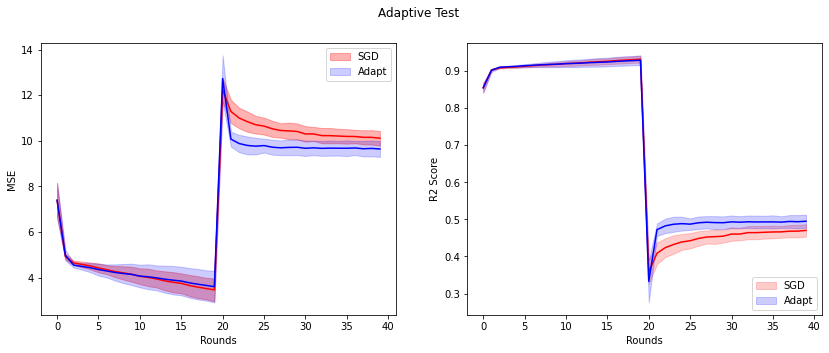

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Adaptive Test")


x = np.arange(len(error_list_fedavg[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='SGD', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='Adapt', alpha=0.2)
#ax1.fill_between(x, np.array(err_s_d)+np.array(err_s_d_std), np.array(err_s_d)-np.array(err_s_d_std), color='green', label='FedREG_Dist', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')
#ax1.plot(x, err_s_d, color='green')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


#ax1.set_ylim(ymin=0, ymax=5)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='SGD', alpha=0.2)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='Adapt', alpha=0.2)
#ax2.fill_between(x, np.array(sc_s_d)+np.array(sc_s_d_std), np.array(sc_s_d)-np.array(sc_s_d_std), color='green', label='FedREG_Dist', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
#ax2.plot(x, sc_s_d, color='green')

ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
#ax2.set_ylim(ymin=0.6, ymax=1)




plt.draw()

plt.savefig("Adaptive_Tests/plots/"+test_name+".svg")

In [6]:
import pandas as pd


d = {'Error_FedAVG': err, 
     'Error_FedAVG_std': err_std,
     'Score_FedAVG': sc, 
     'Score_FedAVG_std': sc_std,
     'Error_Adaptive': err_s, 
     'Error_Adaptive_std': err_s_std,
     'Score_Adaptive': sc_s, 
     'Score_Adaptive_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Adaptive_Tests/data/"+test_name+".csv", index=False)

In [7]:
pd.read_csv("Adaptive_Tests/data/"+test_name+".csv")

,Error_SGD,Error_SGD_std,Score_SGD,Score_SGD_std,Error_Adaptive,Error_Adaptive_std,Score_Adaptive,Score_Adaptive_std
0,7.392771,0.757351,0.854971,0.013064,7.392771,0.757351,0.854971,0.013064
1,4.921680,0.117599,0.903339,0.001665,4.981293,0.230738,0.902155,0.004517
2,4.644118,0.101565,0.908782,0.001805,4.547034,0.112631,0.910690,0.002038
3,4.578478,0.121623,0.910080,0.001893,4.490657,0.144957,0.911809,0.002301
4,4.513094,0.150147,0.911367,0.002501,4.436032,0.197860,0.912890,0.003347
5,4.423814,0.194173,0.913135,0.003114,4.352470,0.262157,0.914551,0.004422
6,4.347582,0.196864,0.914629,0.003284,4.289958,0.286233,0.915780,0.004978
7,4.264198,0.247229,0.916284,0.004127,4.224171,0.356557,0.917094,0.006272
8,4.206429,0.290142,0.917430,0.004950,4.178589,0.418020,0.918004,0.007484
9,4.148450,0.329430,0.918579,0.005707,4.139966,0.469831,0.918777,0.008499


In [17]:
test_name = "test7"

pd.read_csv("Adaptive_Tests/data/"+test_name+".csv").iloc[39]

Error_SGD             10.113067
Error_SGD_std          0.319398
Score_SGD              0.470219
Score_SGD_std          0.016853
Error_Adaptive         9.641041
Error_Adaptive_std     0.345485
Score_Adaptive         0.494972
Score_Adaptive_std     0.017519
Name: 39, dtype: float64